<img src = 'https://upload.wikimedia.org/wikipedia/commons/2/26/World_Health_Organization_Logo.svg'
    width = 690px
    height= 665px />

# **WHO Life Expectancy  —  Non-sensitive Linear Model**

by: Team 1 - Scrum

***

## **The Data**

|Column|Description|
|---:|:---|
|Country|Country|
|Region|Region|
|Year|Year|
|Infant_deaths|Number of Infant Deaths per 1000 population|
|Under_five_deaths|Number of under-five deaths per 1000 population|
|Adult_mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|Alcohol_consumption|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|Incidents_HIV|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP_per_capita|Gross Domestic Product per capita (in USD)|
|Population_mln|Population of the country|
|Thinness_ten_nineteen_years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|Thinness_five_nine_years|Prevalence of thinness among children for Age 5 to 9(%)|
|Schooling|Number of years of Schooling(years)|
|Economy_status_Developed|Developed status|
|Economy_status_Developing|Developing status|
|Life expectancy|Life Expectancy in age|

## **The Scope**

This notebook explores the Life Expectancy dataset from the World Health Organization.\
It outlines the process for building a robust linear regression model that accurately predicts life expectancy.\
The model incorporates some insights gained from the exploratory data analysis (refer to `WHO - EDA.ipynb`)

## **Key Questions Answered**

* How can we implement the insights gained from the exploratory data analysis?
* Which features are most influential in predicting life expectancy?
* How well does a linear regression model perform on this dataset?

***

### 1. Dataset Import

In [13]:
# Importing required modules

import pandas as pd    # for general data use & data analysis
import matplotlib.pyplot as plt    # for data visualisation
import seaborn as sns  # for data visualisation
import numpy as np     # for maths

from sklearn.model_selection import train_test_split    # for performing train-test split on the data

# Use statsmodels for both the model and its evaluation
import statsmodels.api as sm    # we'll get the model from
import statsmodels.tools        # we'll get the evaluation metrics from

from sklearn.preprocessing import RobustScaler   # for scaling the data

from statsmodels.stats.outliers_influence import variance_inflation_factor   # for checking VIF

The DataFrame `df` is created by reading the `Life Expectancy Data.csv` file from a local folder.

In [15]:
df = pd.read_csv('Life Expectancy Data.csv')

In [16]:
# Checking out first 5 rows of data
pd.set_option('display.max_columns', None)
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Inspecting the dataset we can observe that there is a total of `2864` observations and `21` columns. Only 2 columns have `object` datatype: `Country` and `Region`. The rest of the columns are either `int64` or `float64`.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

### 2. Train-Test Split

Now that we have our data loaded let's perform a train-test split. The train set will be used to fit the model and the test set to evaluate.\
Note that the independent variable or target is `Life_expectancy`.

Let's first make a list of all of our features, and then remove `Life_expectancy` from that list, since we won't include it in `X`.

In [22]:
feature_cols = list(df.columns) # the columns that we'll se as features
feature_cols.remove('Life_expectancy') # 'Life_expectancy' removed because it's the target

feature_cols # show list of features

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing']

Using the list of features we can now create `X` with all the features and `y` with the target only. 

In [24]:
X = df[feature_cols] # our features dataframe --> It will become: X_train and X_test
y = df['Life_expectancy'] # our target --> It will become: y_train and y_test

Let's check out `X` and `y`.

In [26]:
X.head(3) 

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1


In [27]:
y.head(3) 

0    76.5
1    82.8
2    65.4
Name: Life_expectancy, dtype: float64

Next, we will perform a train-test split, allocating `80%` of the data for training and `20%` for testing.\
Using `train_test_split` we'll return 4 items: X_train, X_test, y_test and y_train.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, # the features
                                                    y, # the target
                                                    test_size = 0.2, # 20% test size
                                                    random_state = 1) # setting a random seed for reproducibility of results

Let's check out `X_train` and `y_train`.

In [31]:
X_train.head(3)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
2291,United Arab Emirates,Middle East,2001,9.3,10.9,95.5935,1.62,92,92,27.2,94,94,0.13,58422,3.30,5.3,5.1,8.4,0,1
1188,Spain,European Union,2008,3.4,4.2,70.1140,10.24,97,94,26.2,97,97,0.09,27026,45.95,0.6,0.5,9.2,1,0
772,Sao Tome and Principe,Central America and Caribbean,2002,48.0,71.0,217.4790,5.93,70,71,23.7,92,92,1.08,1087,0.15,7.6,7.6,4.3,0,1


In [32]:
y_train.head(3)

2291    74.5
1188    81.2
772     62.7
Name: Life_expectancy, dtype: float64

Next we perform sanity checks to confirm that:
* The indexes of X_train and with y_train coincide
* The indexes of X_test and with y_test coincide

The `all()` function returns `True` if ALL of the elements are True, False otherwise.

In [34]:
print(all(X_train.index == y_train.index))
print(all(X_test.index == y_test.index))

True
True


In [35]:
print(X_train.shape[0] == len(y_train))
print(X_test.shape[0] == len(y_test))

True
True


All sanity checks passed.

Please note that in the exploratory data analysis notebook `WHO - EDA.ipynb`, the dataset underwent thorough inspection, including data quality checks, data types and duplicate and missing values detection. Therefore, these steps are skipped in this notebook.

### 3. Feature Engineering

Let's revisit the key takeaways from the exploratory data analysis and the actions that will be carried forward into the feature engineering phase:

* _Columns with object data type such as `Country` and `Region` can be one-hot encoded, as they don't contain ordinal data. However, `Country` has 179 unique values and one-hot encoding would result in 179 new features and would lead to dimensionality issues._

  **Action:** The `Region` column will be one-hot encoded. This will create `9` additional binary columns: `Region_Africa`, `Region_European Union`, `Region_Asia`, `Region_Central America and Caribbean`, `Region_Rest of Europe`, `Region_Middle East`, `Region_South America`, `Region_Oceania`, `Region_North America`. The `Country` column will be dropped, as one-hot encoding it and using all its 179 columns would lead to an unstable linear model with an extremely high condition number.

* _The `Economy_status_Developed` and `Economy_status_Developing` columns have redundant information. We can prescind from one of those columns._

  **Action:** The `Economy_status_Developed` column will be removed.

* _There are a number of outliers present in several columns. One approach to mitigating their impact could be to apply a transformation or, alternatively, remove some of them._

  **Action:** all outliers will retained, as training the model without them would affect the model's ability to generalise. Data scaling will be performed to mitigate their impact.

* _There are several features that are highly correlated and could potentially be combined when doing feature engineering._

  **Action:** the following features will be combined to address multicollinearity in the model:
  - `Diphtheria` and `Polio`
  - `Under_five_deaths` and `Infant_deaths`
  - `Thinness_ten_nineteen_years` and `Thinness_five_nine_years`


Along with `Country` and `Economy_status_Developed` columns, the `Year` column will also be dropped for following reasons:
* `Year` had a weakly positive correlation with `Life_expectancy`, showing that it doesn't directly influence life expectancy.
* If a model were to learn to predict life expectancy based on the year, it would have issues generalising and would struggle to predict on new data.

Let’s now create our general function for feature engineering to implement the actions outlined above.

In [46]:
def feature_eng(df):
    
    # Creating a copy of the DataFrame
    df = df.copy() 
    
    # One-hot enconding the 'Region' column and dropping it afterwards
    df = pd.get_dummies(df, columns=['Region'], drop_first=True, prefix='Region',dtype=int) 

    # Feature enrichment - creating new columns from combining highly correlated features
    df['Diphtheria_Polio'] = df['Diphtheria'] / df['Polio']
    df['Under_five_Infant_deaths'] = df['Under_five_deaths'] / df['Infant_deaths']
    df['Thinness_combined'] = df['Thinness_ten_nineteen_years'] / df['Thinness_five_nine_years']
    
    # dropping the columns that have been combined 
    df.drop(columns=['Diphtheria', 'Polio', 'Under_five_deaths', 'Infant_deaths','Thinness_five_nine_years', 'Thinness_ten_nineteen_years'], inplace=True)

    # dropping 'Country', 'Economy_status_Developed' and 'Year' columns
    df.drop(columns=['Country', 'Economy_status_Developed', 'Year'], inplace=True)

    # adding a constant
    df = sm.add_constant(df) 
    
    return df  # returning the DataFrame

Let's now apply the `feature_eng()` function to both the training and testing sets, creating new variables named `X_train_fe` and `X_test_fe`.

In [48]:
X_train_fe = feature_eng(X_train)
X_test_fe = feature_eng(X_test)

Next we perform sanity checks to confirm that:
* The indexes of X_train_fe and with y_train coincide
* The indexes of X_test_fe and with y_test coincide

The `all()` function returns `True` if ALL of the elements are True, False otherwise.

In [50]:
print(all(X_train_fe.index == y_train.index))
print(all(X_test_fe.index == y_test.index))

True
True


In [51]:
print(X_train_fe.shape[0] == len(y_train))
print(X_test_fe.shape[0] == len(y_test))

True
True


All sanity checks passed.

Let's check out the first few rows of `X_train_fe`.

In [54]:
pd.set_option('display.max_columns', None)
X_train_fe.head()

,const,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Schooling,Economy_status_Developing,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Diphtheria_Polio,Under_five_Infant_deaths,Thinness_combined
2291,1.0,95.5935,1.62,92,92,27.2,0.13,58422,3.30,8.4,1,0,0,0,1,0,0,0,0,1.000000,1.172043,1.039216
1188,1.0,70.1140,10.24,97,94,26.2,0.09,27026,45.95,9.2,0,0,0,1,0,0,0,0,0,1.000000,1.235294,1.200000
772,1.0,217.4790,5.93,70,71,23.7,1.08,1087,0.15,4.3,1,0,1,0,0,0,0,0,0,1.000000,1.479167,1.000000
1336,1.0,106.0975,12.50,82,64,25.6,0.21,19068,10.42,7.0,0,0,0,1,0,0,0,0,0,1.020833,1.297872,1.333333
429,1.0,129.3125,10.07,98,94,26.1,0.08,10859,38.04,12.2,0,0,0,1,0,0,0,0,0,1.031250,1.176471,0.954545


Let's have a look at the data types in the training set to confirm that all is in order. We must only have numerical values.  

In [56]:
X_train_fe.dtypes

const                                   float64
Adult_mortality                         float64
Alcohol_consumption                     float64
Hepatitis_B                               int64
Measles                                   int64
BMI                                     float64
Incidents_HIV                           float64
GDP_per_capita                            int64
Population_mln                          float64
Schooling                               float64
Economy_status_Developing                 int64
Region_Asia                               int32
Region_Central America and Caribbean      int32
Region_European Union                     int32
Region_Middle East                        int32
Region_North America                      int32
Region_Oceania                            int32
Region_Rest of Europe                     int32
Region_South America                      int32
Diphtheria_Polio                        float64
Under_five_Infant_deaths                

Let's also confirm that we have no null values in our training set. 

In [58]:
X_train_fe.isnull().sum()

const                                   0
Adult_mortality                         0
Alcohol_consumption                     0
Hepatitis_B                             0
Measles                                 0
BMI                                     0
Incidents_HIV                           0
GDP_per_capita                          0
Population_mln                          0
Schooling                               0
Economy_status_Developing               0
Region_Asia                             0
Region_Central America and Caribbean    0
Region_European Union                   0
Region_Middle East                      0
Region_North America                    0
Region_Oceania                          0
Region_Rest of Europe                   0
Region_South America                    0
Diphtheria_Polio                        0
Under_five_Infant_deaths                0
Thinness_combined                       0
dtype: int64

### 4. Data Scaling

In the process of building the linear model, we observed that training it with features with different ranges can cause imbalances in the model, affecting its performance.\
Let’s examine the range between the maximum and minimum values across all columns in `X_train_fe`.

In [61]:
# This function outputs the value ranges of each feature

def range_checker(df):
    columns = list(df.columns)  # create a list with all the columns in the dataframe
    for i in columns:   # iterate through the list of columns
        print(f'The range of "{i}" column is {df[i].max() - df[i].min()}')  # print the difference between maximum and minimum values

In [62]:
range_checker(X_train_fe)

The range of "const" column is 0.0
The range of "Adult_mortality" column is 669.3625
The range of "Alcohol_consumption" column is 17.75
The range of "Hepatitis_B" column is 85
The range of "Measles" column is 87
The range of "BMI" column is 12.3
The range of "Incidents_HIV" column is 21.669999999999998
The range of "GDP_per_capita" column is 112270
The range of "Population_mln" column is 1379.78
The range of "Schooling" column is 13.0
The range of "Economy_status_Developing" column is 1
The range of "Region_Asia" column is 1
The range of "Region_Central America and Caribbean" column is 1
The range of "Region_European Union" column is 1
The range of "Region_Middle East" column is 1
The range of "Region_North America" column is 1
The range of "Region_Oceania" column is 1
The range of "Region_Rest of Europe" column is 1
The range of "Region_South America" column is 1
The range of "Diphtheria_Polio" column is 3.8863636363636362
The range of "Under_five_Infant_deaths" column is 1.2433687311

Let's focus on the non-binary columns.\
We can observe high value ranges in columns such as `GDP_per_capita`, `Population_mln` and `Adult_mortality`.\
On the other hand, there are low value ranges in columns such as `Alcohol_consumption`, `Hepatitis_B`, `Measles`, `BMI` and `Schooling`. Training a linear model with these columns as they are (with such different ranges) would cause imbalances in the model.
###### Note: It was observed that `Incidents_HIV` has an high value range; however, after testing, we concluded that scaling it would increase the condition number of the linear model.

To address this, let's apply scaling to normalize the feature ranges, ensuring model stability and performance.\
We will use `RobustScaler`, which is ideal for data with outliers non-Gaussian distributions, as is the case with this dataset.

In [65]:
# Creating a list of columns to scale
columns_to_scale = ['Adult_mortality','Alcohol_consumption','Hepatitis_B', 'Measles', 'BMI', 'GDP_per_capita','Population_mln', 'Schooling']

# Initialize scaler
scaler = RobustScaler()

# Fit on train and transform both sets
X_train_fe[columns_to_scale] = scaler.fit_transform(X_train_fe[columns_to_scale])
X_test_fe[columns_to_scale] = scaler.transform(X_test_fe[columns_to_scale])

Checking out the first few rows of the scaled dataframe `X_train_fe`.

In [67]:
pd.set_option('display.max_columns', None)
X_train_fe.head(3)

,const,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Schooling,Economy_status_Developing,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Diphtheria_Polio,Under_five_Infant_deaths,Thinness_combined
2291,1.0,-0.488750,-0.358006,0.176471,0.310345,0.50000,0.13,4.836784,-0.197720,0.113208,1,0,0,0,1,0,0,0,0,1.0,1.172043,1.039216
1188,1.0,-0.670939,0.944109,0.470588,0.379310,0.18750,0.09,2.035070,1.786462,0.264151,0,0,0,1,0,0,0,0,0,1.0,1.235294,1.200000
772,1.0,0.382784,0.293051,-1.117647,-0.413793,-0.59375,1.08,-0.279672,-0.344266,-0.660377,1,0,1,0,0,0,0,0,0,1.0,1.479167,1.000000


Running again the `range_checker()` function, we can confirm that the value ranges of the features are more homogeneous.

In [69]:
range_checker(X_train_fe)

The range of "const" column is 0.0
The range of "Adult_mortality" column is 4.786228988911473
The range of "Alcohol_consumption" column is 2.6812688821752264
The range of "Hepatitis_B" column is 5.0
The range of "Measles" column is 3.0
The range of "BMI" column is 3.843750000000001
The range of "Incidents_HIV" column is 21.669999999999998
The range of "GDP_per_capita" column is 10.01873996073532
The range of "Population_mln" column is 64.19074203303093
The range of "Schooling" column is 2.4528301886792447
The range of "Economy_status_Developing" column is 1
The range of "Region_Asia" column is 1
The range of "Region_Central America and Caribbean" column is 1
The range of "Region_European Union" column is 1
The range of "Region_Middle East" column is 1
The range of "Region_North America" column is 1
The range of "Region_Oceania" column is 1
The range of "Region_Rest of Europe" column is 1
The range of "Region_South America" column is 1
The range of "Diphtheria_Polio" column is 3.8863636

Now our data is ready for modelling!

### 5. Multicollinearity Assessment

With the `Variance Inflation Factor (VIF)` we can detect multicollinearity in the data. We'll want to avoid multicollinearity as it increases the model's condition number and negatively impacts the robustness and stability of our model.

In [73]:
vif_data = pd.DataFrame()  # create a new dataframe 
vif_data['Feature'] = X_train_fe.columns   # create a 'Feature' column which will contain the names of the features in X_train_fe
vif_data['VIF'] = [variance_inflation_factor(X_train_fe.values, i) for i in range(X_train_fe.shape[1])]  # using a loop, calculate the VIF for each feature (list comprehension taken from DataCamp website)
print(vif_data)

                                 Feature         VIF
0                                  const  372.828302
1                        Adult_mortality    6.207831
2                    Alcohol_consumption    3.313367
3                            Hepatitis_B    1.514203
4                                Measles    1.649829
5                                    BMI    3.704790
6                          Incidents_HIV    2.677381
7                         GDP_per_capita    2.555753
8                         Population_mln    1.177487
9                              Schooling    4.740767
10             Economy_status_Developing    7.097740
11                           Region_Asia    2.500059
12  Region_Central America and Caribbean    2.092687
13                 Region_European Union    6.311358
14                    Region_Middle East    2.060330
15                  Region_North America    1.496852
16                        Region_Oceania    1.879817
17                 Region_Rest of Europe    2.

* Features with **VIF = 1** (no multicollinearity): `Diphtheria_Polio`, `Thinness_combined`
* Features with **VIF between 1 and 5** (moderate multicollinearity): `Hepatitis_B`, `Measles`, `Population_mln`, `Alcohol_consumption`, `BMI`, `Incidents_HIV`, `GDP_per_capita`, `Schooling`, `Region_North America`, `Region_Oceania`, `Region_South America`, `Region_Asia`, `Region_Central America and Caribbean`, `Region_Middle East`, `Region_Rest of Europe`, `Under_five_Infant_deaths`
* Features with **VIF > 5** (high multicollinearity): `Adult_mortality`, `Economy_status_Developing`, `Region_European Union`

There are no features with a **VIF > 10** (serious muticollinearity).

### 6. Modelling

Let's now build an OLS (Ordinary Least Squares) model!

In [77]:
lin_reg = sm.OLS(y_train, X_train_fe) # initialising the model object with 'y_train' and 'X_train_fe'
results = lin_reg.fit() # we fit the model and store it inside results
results.summary() # check out the summary of our model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3026.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:02:02   Log-Likelihood:                -4532.4
No. Observations:                2291   AIC:                             9109.
Df Residuals:                    2269   BIC:                             9235.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   80.6075      0.709    113.654      0.000      79.217      81.998
Adult_mortality                         -8.7529      0.111    -78.797      0.000      -8.971      -8.535
Alcohol_consumption                      0.3252      0.111      2.930      0.003       0.108       0.543
Hepatitis_B                              0.4906      0.048     10.265      0.000       0.397       0.584
Measles                                  0.0294      0.073      0.401      0.689      -0.115       0.173
BMI                                     -0.4615      0.103     -4.459      0.000      -0.664      -0.259
Incidents_HIV                            0.3699      0.024     15.136      0.000       0.322       0.418
GDP_per_capita                           0.1357      0.039      3.484      0.001       0.059       0.212
Population_mln                           0.0016      0.006      0.256      0.798      -0.011       0.014
Schooling                                2.1734      0.134     16.255      0.000       1.911       2.436
Economy_status_Developing               -2.2119      0.242     -9.128      0.000      -2.687      -1.737
Region_Asia                              0.4145      0.161      2.568      0.010       0.098       0.731
Region_Central America and Caribbean     2.5671      0.174     14.795      0.000       2.227       2.907
Region_European Union                    0.2097      0.260      0.807      0.420      -0.300       0.719
Region_Middle East                       1.0046      0.194      5.166      0.000       0.623       1.386
Region_North America                     1.6071      0.352      4.567      0.000       0.917       2.297
Region_Oceania                          -0.0955      0.210     -0.454      0.650      -0.508       0.317
Region_Rest of Europe                    1.0327      0.204      5.068      0.000       0.633       1.432
Region_South America                     2.3292      0.197     11.840      0.000       1.943       2.715
Diphtheria_Polio                        -1.6603      0.329     -5.049      0.000      -2.305      -1.015
Under_five_Infant_deaths                -5.7943      0.411    -14.112      0.000      -6.599      -4.989
Thinness_combined                       -0.1565      0.089     -1.763      0.078      -0.331       0.018
==============================================================================
Omnibus:                       73.492   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.950
Skew:                          -0.174   Prob(JB):                     1.12e-35
Kurtosis:                       4.251   Cond. No.                         148.
===============================================================

Let's inspect results and focus on R-squared, Adj. R-squared, BIC, AIC, p-value and Cond. No:
* **R-squared**: the model fits the data really good, explaining 96% of the variance.
* **AIC and BIC**: values are around 9000
* **p-values**: generally good (below 0.05), except for the following features: `Measles`, `Population_mln`, `Region_European Union`, `Region_Oceania`, `Thinness_combined`. 
* **Cond. No.**: really good, considering that the ideal value is below 300. This indicates that the model is stable and can be trusted.

### 7. Model Evaluation

Let's use the model to predict on the training set `X_train_fe` and calculate the RMSE value.

In [81]:
# Create our prediction results and store them
y_pred = results.predict(X_train_fe)

# Calculate the RMSE of our model on the training set
rmse_train = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

# Print out the result
print(rmse_train)

1.7496603153194539


And now we predict on the test set `X_test_fe` and calculate the RMSE value.

In [83]:
# Predict once again using our results 
y_test_pred = results.predict(X_test_fe)

# Calculate the RMSE for Test
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)

# Print out the result
print(rmse_test)

1.703871066343788


The RMSE values for the training and test sets are considerably close, indicating that the model generalizes well to unseen data and does not exhibit significant overfitting or underfitting.

Let's visualise the predictions against the actual values.

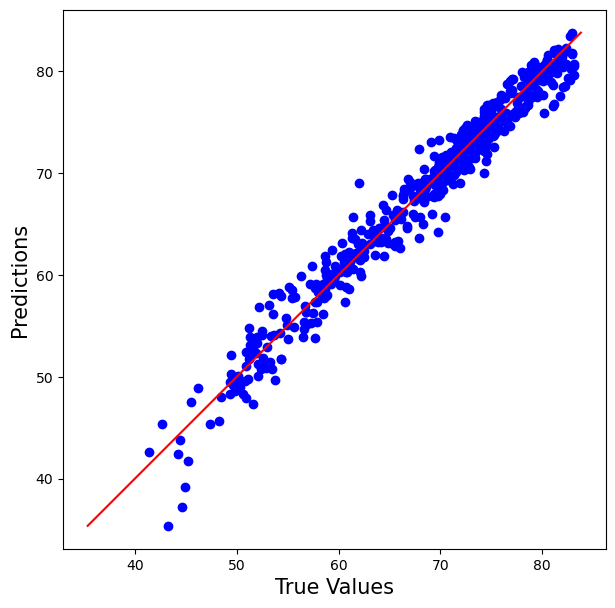

In [86]:
true_value = y_test
predicted_value = y_test_pred

#plotting true values against the models predictions to see trend
plt.figure(figsize=(7,7))
plt.scatter(true_value, predicted_value, color='blue')

#p1 and p2 make the best line for perfect regression (line of best fit)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

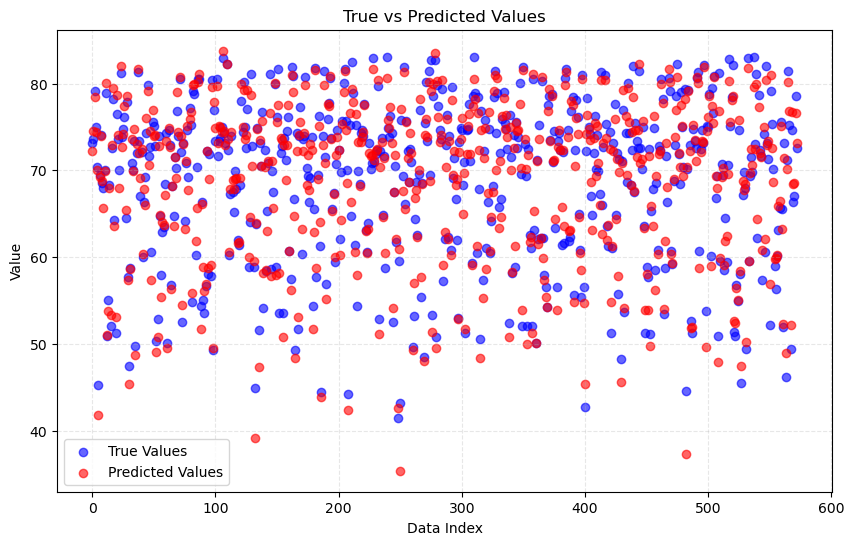

In [87]:
plt.figure(figsize=(10, 6))

# Scatter true values, plot each entry
plt.scatter(np.arange(len(y_test)), y_test, 
            color='blue', label='True Values', alpha=0.6)

# Scatter predicted values, and plotting each entry again
plt.scatter(np.arange(len(y_test_pred)), y_test_pred, 
            color='red', label='Predicted Values', alpha=0.6)

#X axis has no relation, literally just the position index of the data points
plt.xlabel('Data Index')
plt.ylabel('Value')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### 8. Conclusions

The following features were found to be statistically significant predictors of `Life_expectancy`:
* Health-related predictors:
  - `Adult_mortality`, `Incidents_HIV` and `Under_five_Infant_deaths` (which were negatively correlated to life expectancy) suggest that higher mortality rates across different age groups are associated with lower overall life expectancy in a country.
  - `Hepatitis_B` and `Diphtheria_Polio` (which were positively correlated to life expectancy) suggest that the more immunization coverage there is among 1-year-olds (%), the higher the overall life expectancy in a country will be.
  - `Alcohol_consumption` and `BMI` (which were positively correlated to life expectancy) suggest that more alcohol the population consumes and the larger the body mass index is, then the higher the overall life expectancy in a country will be. We should be careful interpreting these results as they are. The reason behind these results might be because developed countries have more access to alcohol and the population tend to have a larger BMI than the populations in underdeveloped countries. 
* Economic predictors:
  - `Economy_status_Developing` (which was negatively correlated to life expectancy) suggests that if a country hasn't developed, the lower the overall life expectancy in a country will be. 
  - `GDP_per_capita` (which was positively correlated to life expectancy) suggests that the higher the GDP is, the higher the overall life expectancy in a country will be. GDP measures the monetary value of final goods and services produced in a country in a given period of time.
* Educational predictors:
  - `Schooling` (which was positively correlated to life expectancy) suggests that the more years of schooling the country has, the higher the overall life expectancy in a country will be. 
* Geographic predictors:
  - `Region_Central America and Caribbean`, `Region_Middle East`, `Region_North America`, `Region_Rest of Europe` and `Region_South America` suggest that location plays an important role in life expectancy outcomes. This means that populations living in these regions tend to have a shorter lifespan.

***